In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_for_yolo(image_path):
    # 1. Cargar y normalizar tamaño
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (640, 640))

    # 2. Corrección de iluminación
    lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    L, A, B = cv2.split(lab)

    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    L2 = clahe.apply(L)

    lab2 = cv2.merge((L2, A, B))
    img_equalized = cv2.cvtColor(lab2, cv2.COLOR_LAB2RGB)

    # 3. Suavizado bilateral (reduce ruido sin borrar bordes)
    img_smooth = cv2.bilateralFilter(img_equalized, d=9, sigmaColor=60, sigmaSpace=60)

    # 4. High-boost (realza bordes y racimos)
    blur = cv2.GaussianBlur(img_smooth, (7,7), 0)
    high_boost = cv2.addWeighted(img_smooth, 1.7, blur, -0.7, 0)

    return img, high_boost


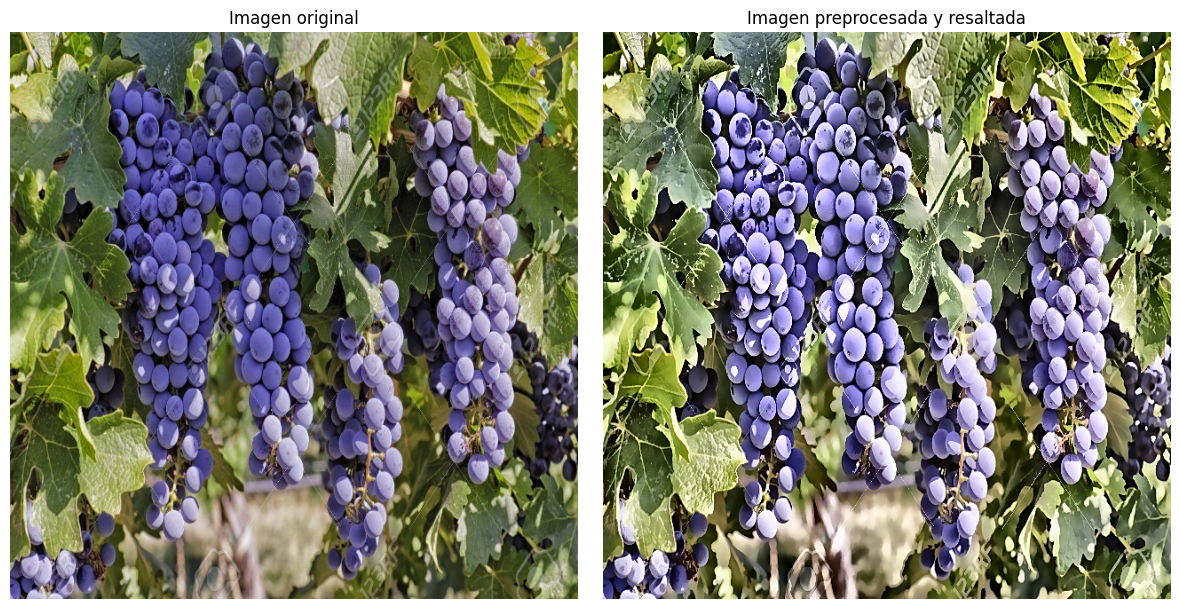

In [4]:
original, enhanced = preprocess_for_yolo("uvas_2.jpg")

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(original)
plt.title("Imagen original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(enhanced)
plt.title("Imagen preprocesada y resaltada")
plt.axis("off")

plt.tight_layout()
plt.show()